## 1.导入依赖包

In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Dense, Flatten, Dropout, MaxPool2D

## 2.导入数据

In [2]:
train = pd.read_csv('../../data/fashion_train.csv')
test = pd.read_csv('../../data/fashion_test.csv')
print(train.shape, test.shape)

(42000, 785) (28000, 784)


## 3.数据预处理

In [3]:
input_shape = (28, 28, 1)
x = np.array(train.iloc[:, 1:])
y = keras.utils.to_categorical(np.array(train.iloc[:, 0]))
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape)

(33600, 784) (33600, 10)


In [4]:
x_test = np.array(test.iloc[:, 0:])
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape, y_train.shape)

(33600, 28, 28, 1) (33600, 10)


In [5]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255

batch_size = 64
classes = 10
epochs = 5

## 4.建立模型

In [6]:
model = keras.models.Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    Dropout(0.2),

    Conv2D(filters=128, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(filters=128, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    Dropout(0.2),

    Conv2D(filters=256, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(filters=256, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(filters=256, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    Dropout(0.2),

    Conv2D(filters=512, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(filters=512, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(filters=512, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    Dropout(0.2),

    Conv2D(filters=512, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(filters=512, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(filters=512, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    Dropout(0.2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(classes, activation='softmax'),
])

## 5.定义优化器、损失函数和评价指标

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 6.断点续训

In [8]:
save_path = './checkpoint/VGG16.ckpt'
if os.path.exists(save_path + '.index'):
    print('model loading')
    model.load_weights(save_path)
cp_callback = keras.callbacks.ModelCheckpoint(filepath=save_path,
                                              save_weights_only=True,
                                              save_best_only=True)

## 7.训练模型

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val),
                    callbacks=[cp_callback])

Epoch 1/5
525/525 [==============================] - 84s 121ms/step - loss: 0.9529 - accuracy: 0.6220 - val_loss: 1.0047 - val_accuracy: 0.6890
Epoch 2/5
525/525 [==============================] - 28s 53ms/step - loss: 0.4786 - accuracy: 0.8310 - val_loss: 0.4118 - val_accuracy: 0.8665
Epoch 3/5
525/525 [==============================] - 26s 49ms/step - loss: 0.3743 - accuracy: 0.8697 - val_loss: 0.3384 - val_accuracy: 0.8887
Epoch 4/5
525/525 [==============================] - 58s 111ms/step - loss: 0.3317 - accuracy: 0.8874 - val_loss: 0.2819 - val_accuracy: 0.9073
Epoch 5/5
525/525 [==============================] - 75s 143ms/step - loss: 0.3019 - accuracy: 0.8961 - val_loss: 0.2844 - val_accuracy: 0.8992


## 8.预测结果

In [10]:
result = model.predict(x_test)
pred = tf.argmax(result, axis=1)
df = pd.DataFrame(pred, columns=['label'])
df.to_csv(path_or_buf='Submission.csv', index_label='image_id')

## 9.损失和准确率可视化

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


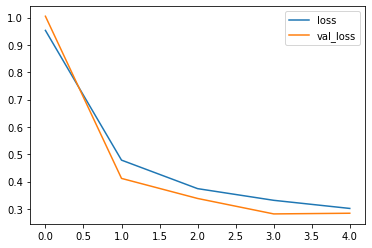

In [12]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()

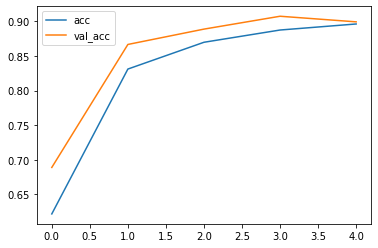

In [13]:
plt.plot(history.epoch, history.history.get('accuracy'), label='acc')
plt.plot(history.epoch, history.history.get('val_accuracy'), label='val_acc')
plt.legend()
plt.show()